### <span style="color:green"> Analysis stool microbial communities in R
    
---

In [ ]:
setwd('/home/ubuntu/scripts/')

In [67]:
tab<-read.table("data/stool_species.txt", h=T, sep='\t')
tab

a,b,c,d,e,f,g,h
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
31,13,9,24,12,6,6,8
21,17,0,0,9,9,0,24
33,15,15,19,15,13,13,11
20,38,0,1,0,14,0,12
33,10,6,24,22,1,0,0
81,4,1,0,1,0,0,0


In [68]:
s<-read.table("data/stool_samples.txt", h=T, sep='\t')
s$yogurt <- as.factor(s$yogurt)
s


yogurt,Com
<fct>,<chr>
no,Stool_sample_A
no,Stool_sample_B
no,Stool_sample_C
yes,Stool_sample_D
yes,Stool_sample_E
yes,Stool_sample_F


In [69]:
library(vegan)
library(ade4)
par(mfrow=c(1,2))

#First with Euclidean distances and abundance:

#Let’s calculate Euclidean distances between the samples

vegdist(tab, method="euclidean", binary=FALSE)



         1        2        3        4        5
2 32.90897                                    
3 13.60147 33.52611                           
4 40.19950 26.32489 40.53394                  
5 15.71623 40.17462 24.77902 48.11445         
6 58.97457 67.01492 60.30755 72.24957 58.16356

<span style="color:red"> Q: do the values match what you calculated?

### let’s use these distances for a PCA

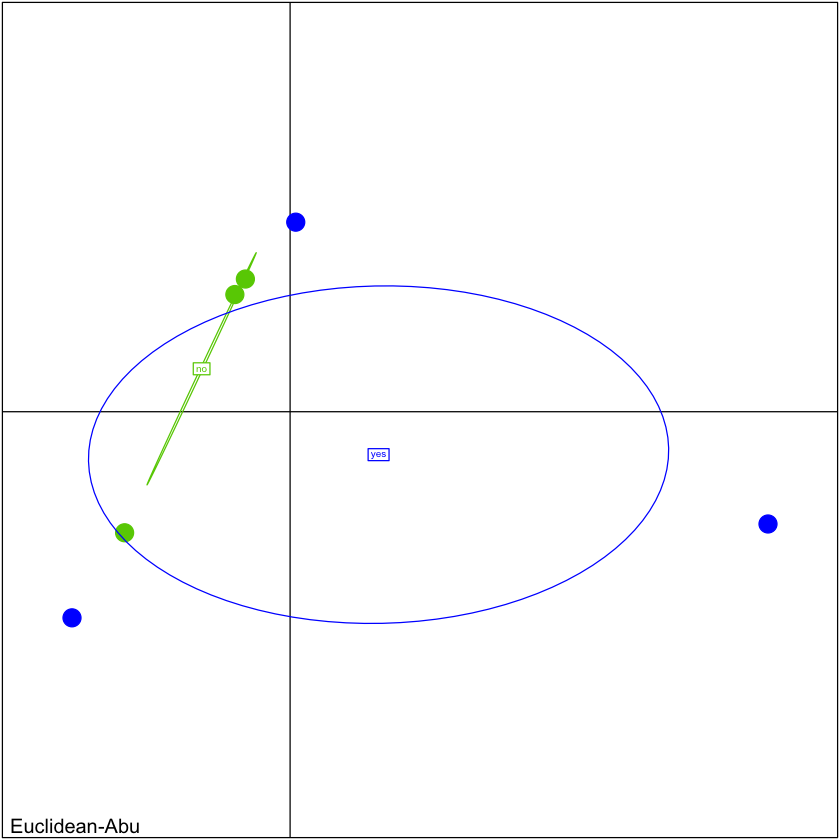

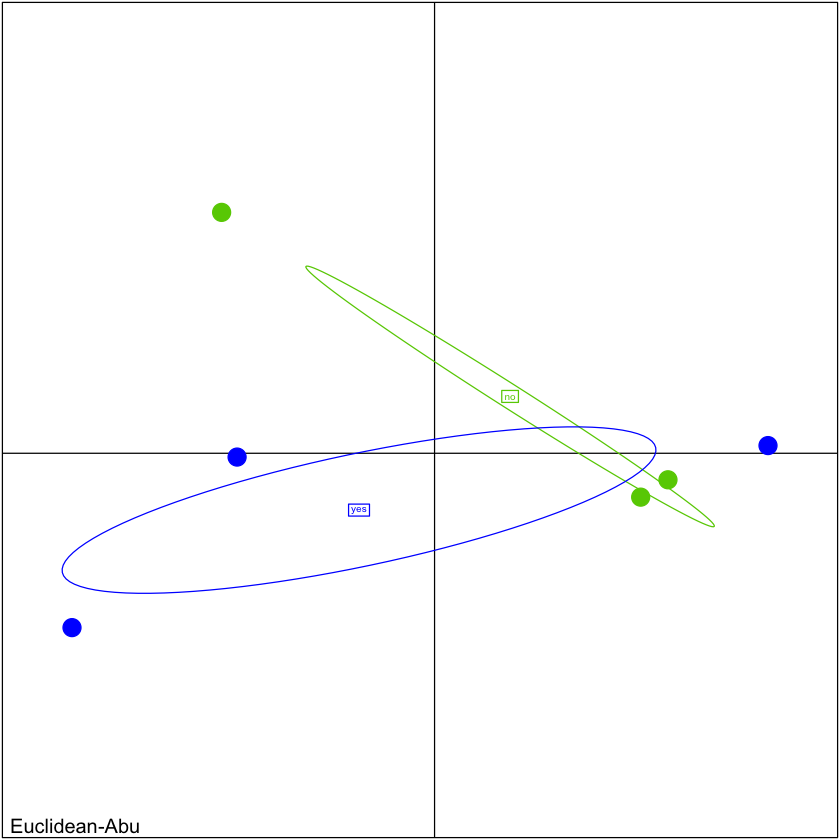

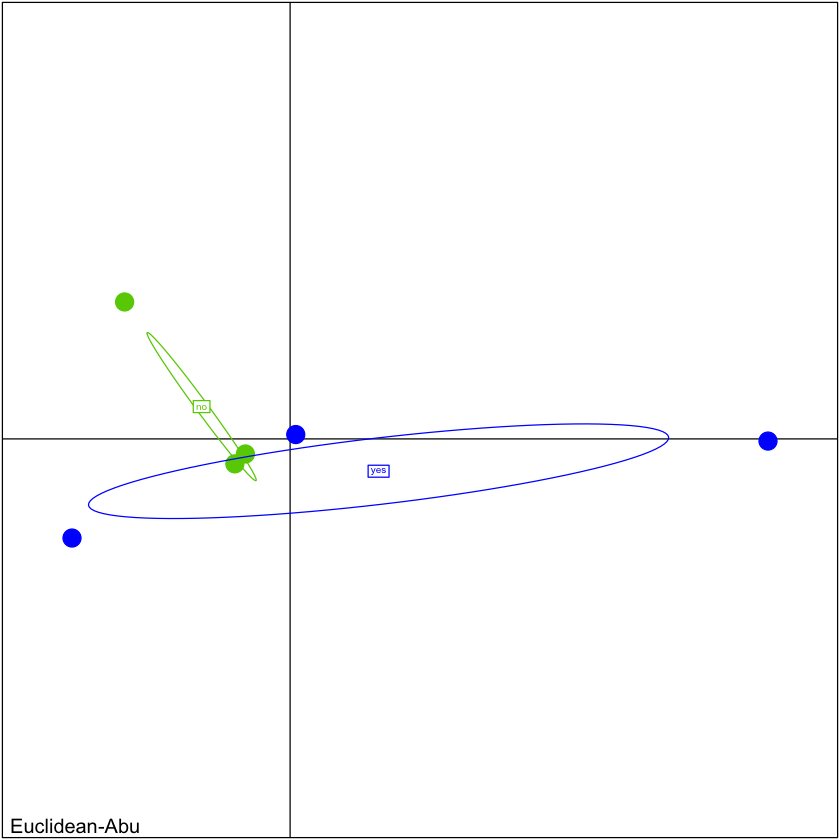

In [70]:
pca_euc_tab<-dudi.pco(vegdist(tab, method="euclidean", binary=FALSE), scannf=F, nf=4)

s.class(pca_euc_tab$li, s$yogurt, xax=1, yax=2, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("chartreuse3","blue"), clabel = 0.5, sub="Euclidean-Abu")

s.class(pca_euc_tab$li, s$yogurt, xax=2, yax=3, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("chartreuse3","blue"), clabel = 0.5, sub="Euclidean-Abu")
s.class(pca_euc_tab$li, s$yogurt, xax=1, yax=3, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("chartreuse3","blue"), clabel = 0.5, sub="Euclidean-Abu")



In [71]:
inertia(pca_euc_tab)

Inertia information:
Call: inertia.dudi(x = pca_euc_tab)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1 532.690   532.7   61.18
Ax2 236.617   769.3   88.36
Ax3  50.867   820.2   94.20
Ax4  44.477   864.6   99.31
Ax5   5.989   870.6  100.00

<span style="color:red">Q: Are the groups yogurt and no-yogurt separated? 

---
### let’s test this with a PerMANOVA analysis: permutational analysis of variance ~ ANOVA but for many variables.

The P value is calculated by comparing differences between groups to differences between groups.

In [73]:

adonis2(tab ~ s$yogurt, method="euclidean", binary=F, permutations=1000)

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s$yogurt,1,787.1667,0.1506876,0.709692,0.6
Residual,4,4436.6667,0.8493124,NA,NA
Total,5,5223.8333,1.0000000,NA,NA


<span style="color:red">Q: Are the communities from groups yogurt and no-yogurt different?

---
### Let’s re do the analysis with Euclidean distances and relative abundances:

          1         2         3         4         5
2 0.3495105                                        
3 0.1100810 0.3164617                              
4 0.4380477 0.3106494 0.4145820                    
5 0.1721312 0.4458431 0.2472012 0.5350265          
6 0.7058352 0.7665891 0.7342352 0.8320954 0.6788818

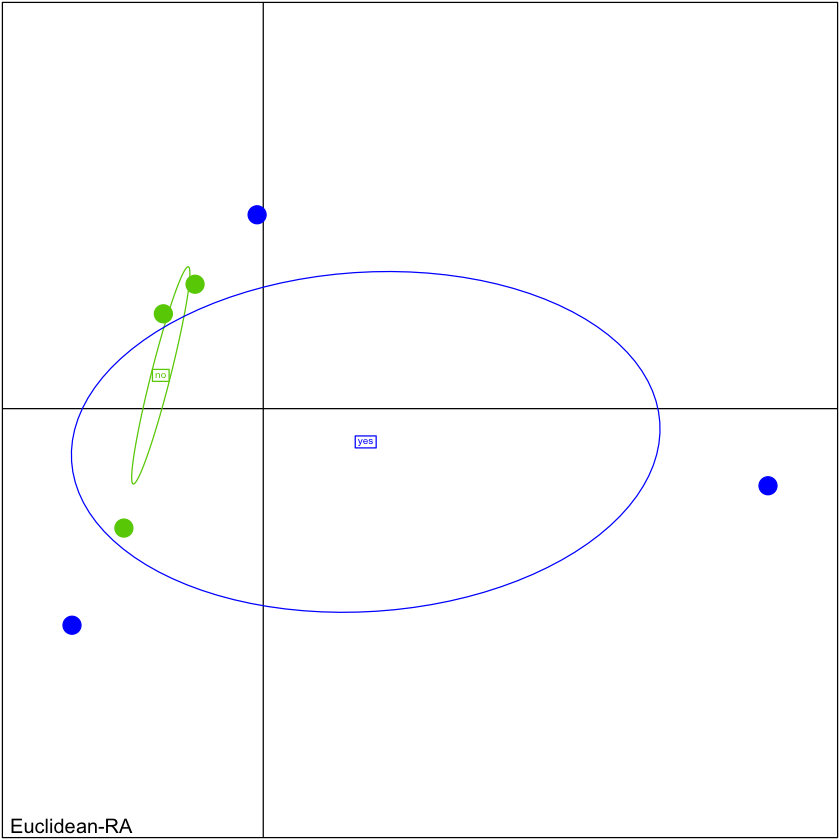

In [75]:
ra.tab<-decostand(tab, method="total", MARGIN=1)

vegdist(ra.tab, method="euclidean", binary=FALSE)


pca_euc_ra.tab<-dudi.pco(vegdist(ra.tab, method="euclidean", binary=FALSE), scannf=F, nf=4)

s.class(pca_euc_ra.tab$li, s$yogurt, xax=1, yax=2, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("chartreuse3","blue"), clabel = 0.5, sub="Euclidean-RA")



In [76]:
adonis2(ra.tab~s$yogurt, method="euclidean", binary=F, permutations=1000)

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s$yogurt,1,0.1168007,0.1730943,0.8373111,0.6
Residual,4,0.5579800,0.8269057,NA,NA
Total,5,0.6747807,1.0000000,NA,NA


<span style="color:red">Q: Are the results different? 
    
---

### Now with Bray-Curtis distances and RA:

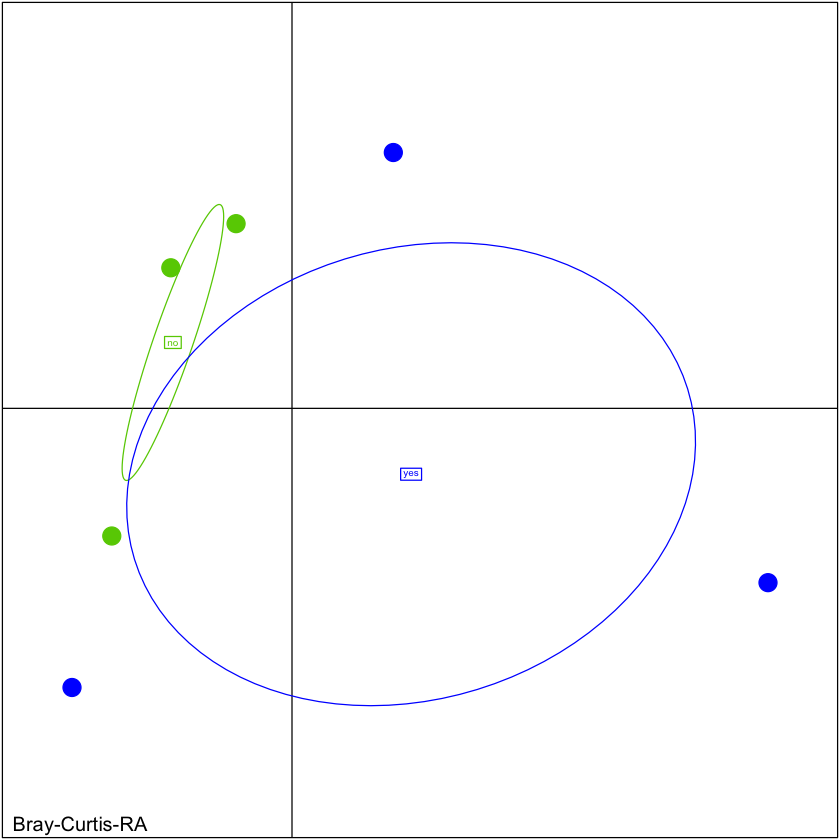

In [78]:
ra.tab<-decostand(tab, method="total", MARGIN=1)


pca_bc_ra.tab<-dudi.pco(vegdist(ra.tab, method="bray", binary=FALSE), scannf=F, nf=4)

s.class(pca_bc_ra.tab$li, s$yogurt, xax=1, yax=2, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("chartreuse3","blue"), clabel = 0.5, sub="Bray-Curtis-RA")

In [79]:
adonis2(ra.tab~s$yogurt, method="bray", binary=F, permutations=1000)

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s$yogurt,1,0.1273095,0.1975384,0.9846624,0.4
Residual,4,0.5171703,0.8024616,NA,NA
Total,5,0.6444799,1.0000000,NA,NA


<span style="color:red">Q: Are the results different? 
    
---
    
### hierarchical clustering with Euclidean distances and Bray-Curtis distances

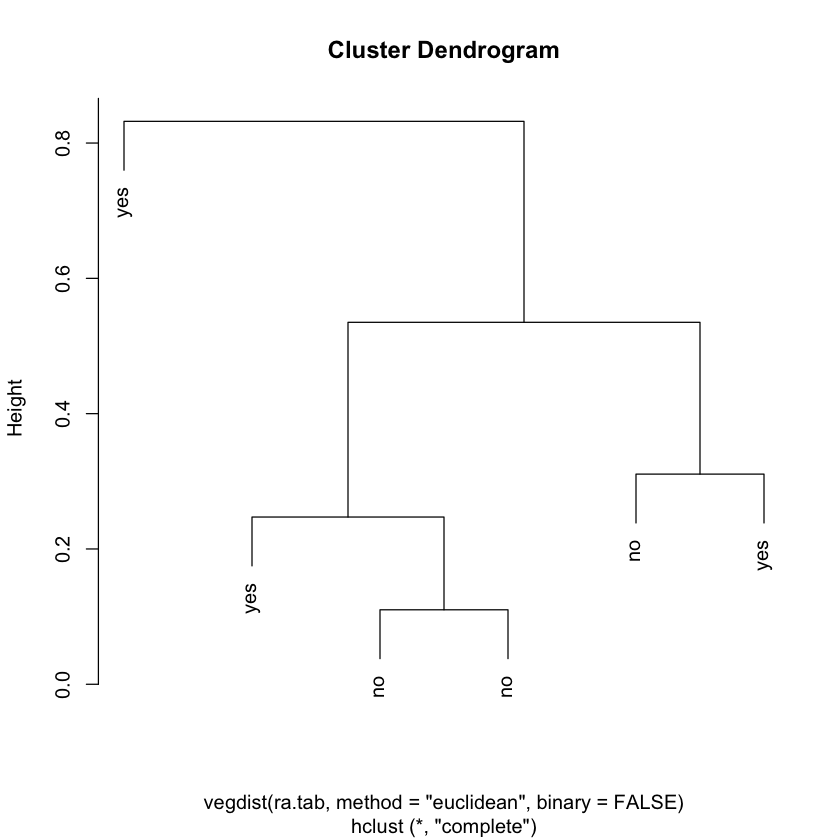

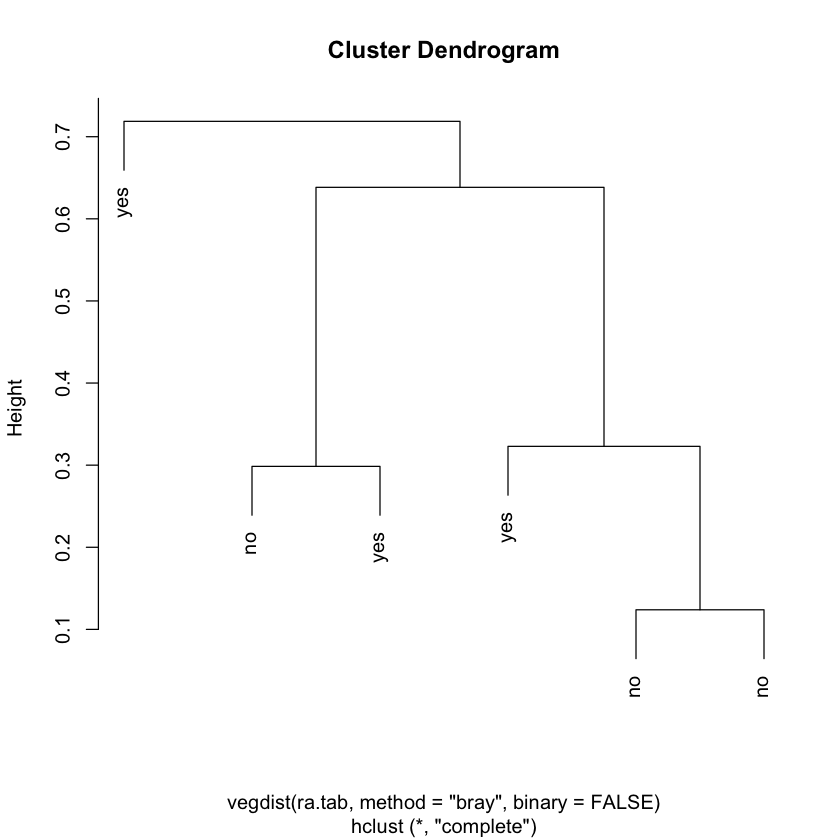

In [80]:
plot(hclust(vegdist(ra.tab, method="euclidean", binary=FALSE), method = "complete", members = NULL), labels=s$yogurt)

plot(hclust(vegdist(ra.tab, method="bray", binary=FALSE), method = "complete", members = NULL), labels=s$yogurt)

<span style="color:red">Q: Are the results different?